<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas


In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [ ]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-11-24 03:45:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.0MB/s    in 2.5s    

2025-11-24 03:45:09 (60.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [ ]:
df = pd.read_csv("survey-data.csv")

#### Display the first few rows to understand the structure of the data


In [ ]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


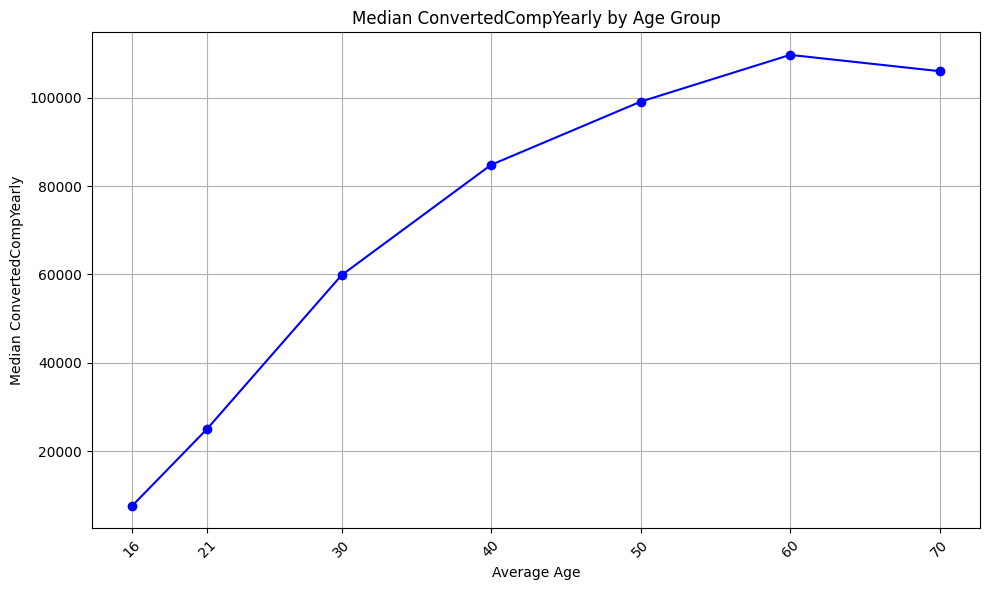

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ تحويل الفئات العمرية إلى أرقام
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# 2️⃣ تنظيف البيانات
df_clean = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly']).copy()
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean = df_clean.dropna(subset=['ConvertedCompYearly'])

# 3️⃣ تجميع حسب العمر وحساب الوسيط
median_by_age = df_clean.groupby('AgeNumeric')['ConvertedCompYearly'].median().sort_index()

# 4️⃣ رسم Line Chart
plt.figure(figsize=(10,6))
plt.plot(median_by_age.index, median_by_age.values, marker='o', linestyle='-', color='blue')
plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Average Age')
plt.ylabel('Median ConvertedCompYearly')
plt.xticks(median_by_age.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


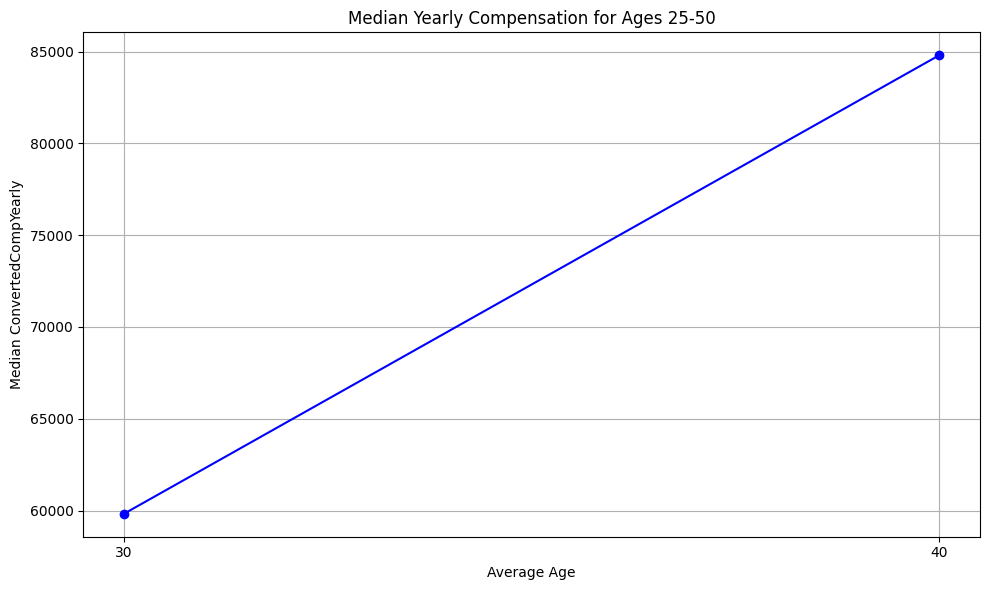

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# تحويل الفئات العمرية إلى متوسط رقمي
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# تنظيف البيانات
df_clean = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly']).copy()
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean = df_clean.dropna(subset=['ConvertedCompYearly'])

# تصفية الأعمار من 25 إلى 50
df_filtered = df_clean[(df_clean['AgeNumeric'] >= 25) & (df_clean['AgeNumeric'] <= 45)]

# تجميع وحساب الوسيط لكل فئة عمرية
median_by_age = df_filtered.groupby('AgeNumeric')['ConvertedCompYearly'].median().sort_index()

# رسم Line Chart
plt.figure(figsize=(10,6))
plt.plot(median_by_age.index, median_by_age.values, marker='o', linestyle='-', color='blue')
plt.title('Median Yearly Compensation for Ages 25-50')
plt.xlabel('Average Age')
plt.ylabel('Median ConvertedCompYearly')
plt.xticks(median_by_age.index)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


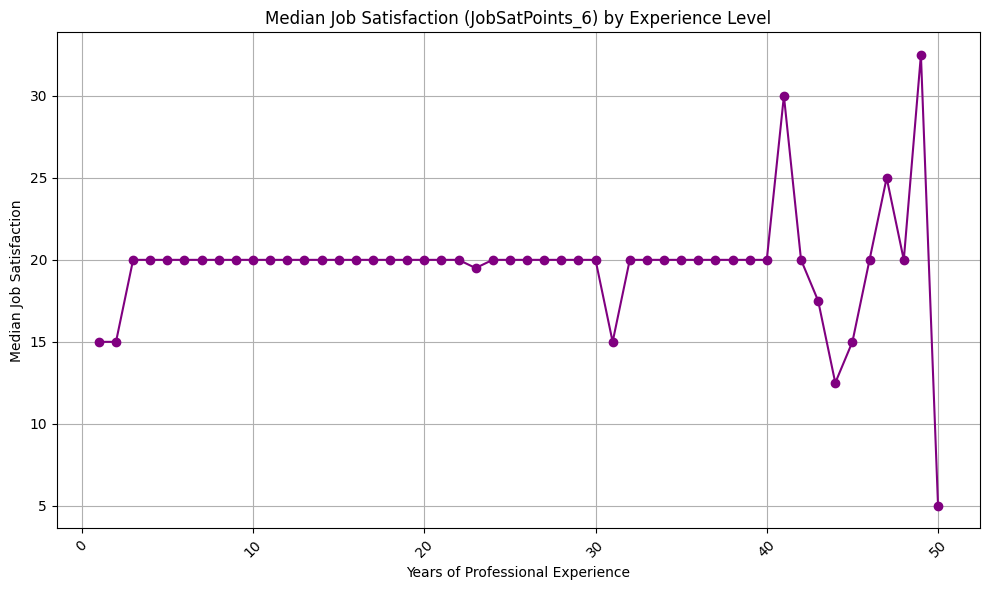

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# اختر العمود المناسب للخبرة
experience_col = 'YearsCodePro'  # أو 'YearsCoding' حسب توفر العمود

# 1️⃣ تنظيف البيانات
df_clean = df.dropna(subset=[experience_col, 'JobSatPoints_6']).copy()
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean[experience_col] = pd.to_numeric(df_clean[experience_col], errors='coerce')
df_clean = df_clean.dropna(subset=['JobSatPoints_6', experience_col])

# 2️⃣ تجميع حسب الخبرة وحساب الوسيط
median_by_experience = df_clean.groupby(experience_col)['JobSatPoints_6'].median().sort_index()

# 3️⃣ رسم Line Chart
plt.figure(figsize=(10,6))
plt.plot(median_by_experience.index, median_by_experience.values, marker='o', linestyle='-', color='purple')
plt.title('Median Job Satisfaction (JobSatPoints_6) by Experience Level')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


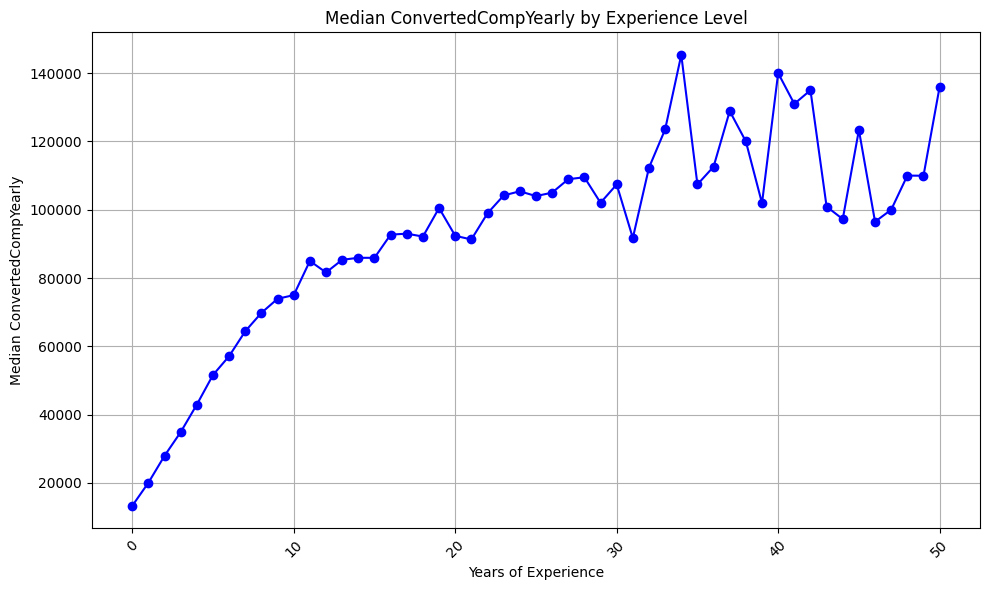

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

experience_col = 'WorkExp'

# 1️⃣ تنظيف البيانات
df_clean = df.dropna(subset=[experience_col, 'ConvertedCompYearly']).copy()
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean[experience_col] = pd.to_numeric(df_clean[experience_col], errors='coerce')
df_clean = df_clean.dropna(subset=['ConvertedCompYearly', experience_col])

# 2️⃣ تجميع حسب الخبرة وحساب الوسيط
median_by_experience = df_clean.groupby(experience_col)['ConvertedCompYearly'].median().sort_index()

# 3️⃣ رسم Line Chart
plt.figure(figsize=(10,6))
plt.plot(median_by_experience.index, median_by_experience.values, marker='o', linestyle='-', color='blue')
plt.title('Median ConvertedCompYearly by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Median ConvertedCompYearly')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Copyright © IBM Corporation. All rights reserved.
